In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer_acquisition_data.csv')

In [3]:
df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [7]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
profit             0
dtype: int64

# Cost Distribution

Text(0.5, 1.0, 'Cost Distribution')

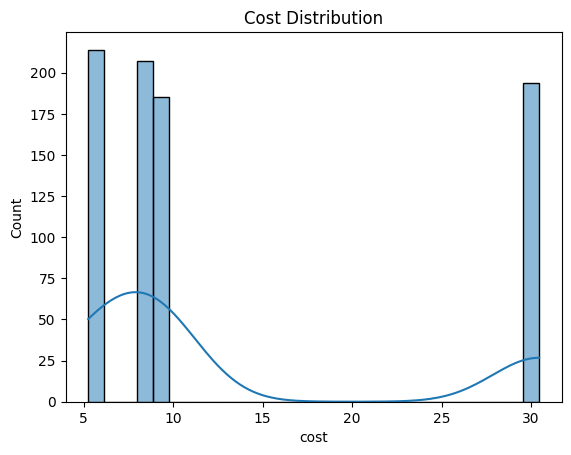

In [10]:
sns.histplot(df,x='cost',kde=True)
plt.title('Cost Distribution')

# Conversion Rate Distribution

Text(0.5, 1.0, 'Conversion Rate Distribution')

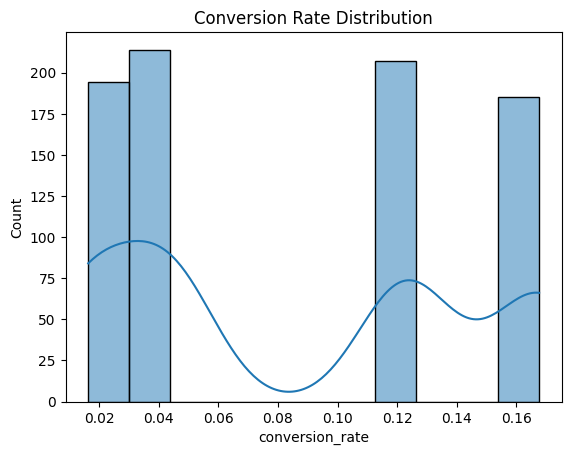

In [11]:
sns.histplot(df,x='conversion_rate',kde=True)
plt.title('Conversion Rate Distribution')

# Revenue generated from customers

Text(0.5, 1.0, 'Revenue generated from customers')

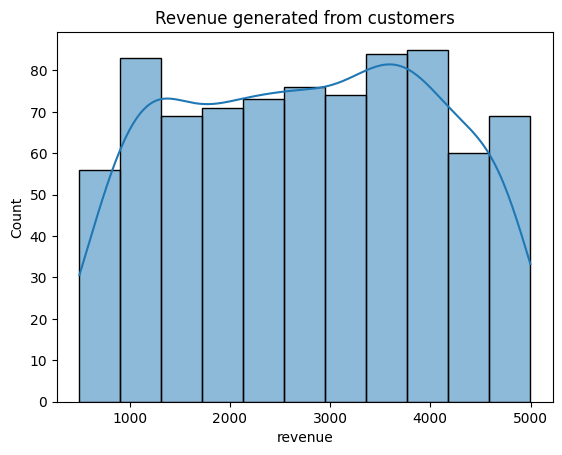

In [20]:
sns.histplot(df,x='revenue',kde=True)
plt.title('Revenue generated from customers')

# Customer Acquisition Cost across different channels

In [47]:
total_cost=df.groupby('channel')['cost'].sum().reset_index()
total_cost

,channel,cost
0,email marketing,1122.700340
1,paid advertising,5907.363479
2,referral,1722.307634
3,social media,1766.070249


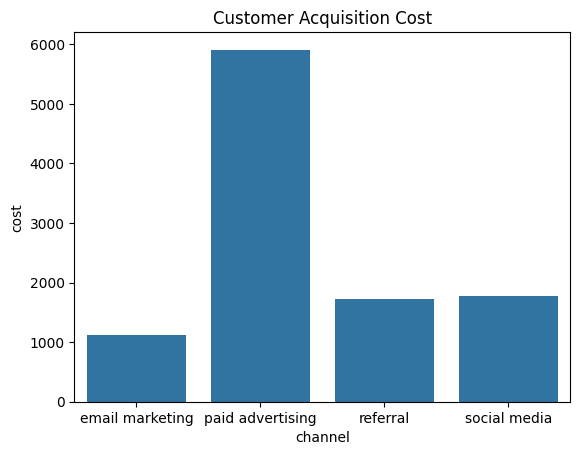

In [18]:

sns.barplot(total_cost,x='channel',y='cost')
plt.title('Customer Acquisition Cost')
plt.show()

In [46]:
total_cost=df.groupby('channel')['revenue'].sum().reset_index()
total_cost

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


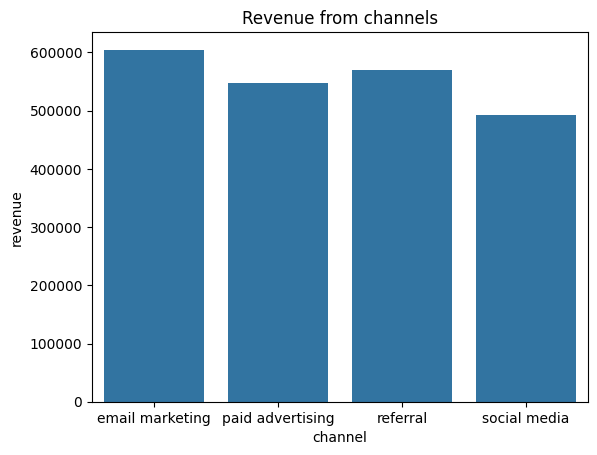

In [22]:
sns.barplot(total_cost,x='channel',y='revenue')
plt.title('Revenue from channels')
plt.show()

# Return on Investment

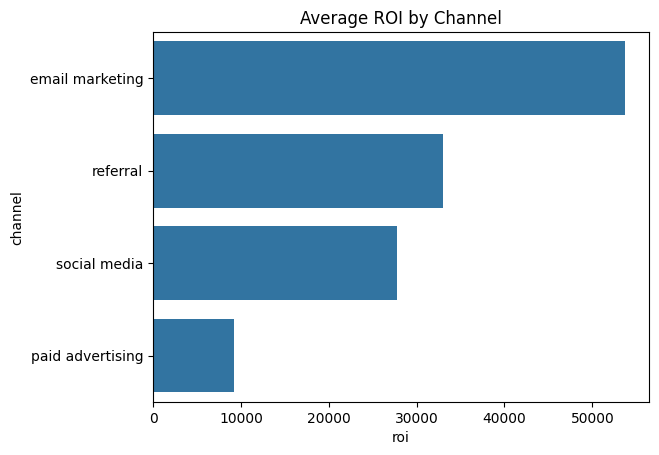

In [36]:
df['roi'] = ((df['revenue'] - df['cost']) / df['cost']) * 100
roi_by_channel=df.groupby('channel')['roi'].mean().reset_index().sort_values(by='roi',ascending=False)
sns.barplot(roi_by_channel,x='roi', y='channel', orient='h')
plt.title('Average ROI by Channel')
plt.show()

# Customer Life Time Value
CLTV=(revenue-cost)*conversion_rate/cost

In [44]:
df['cltv']=(df['revenue']-df['cost'])*df['conversion_rate']/df['cost']
cltv=df.groupby('channel')['cltv'].mean().reset_index()
cltv

,channel,cltv
0,email marketing,23.559595
1,paid advertising,1.500682
2,referral,40.599817
3,social media,46.584325


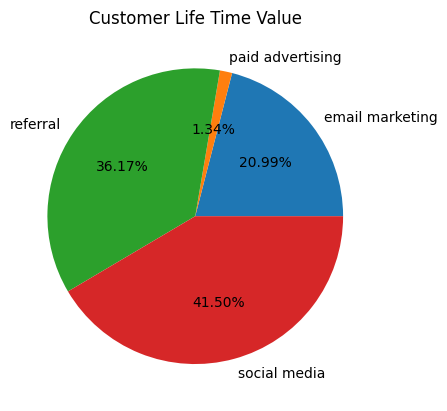

In [43]:
plt.pie(cltv['cltv'],labels=cltv['channel'],autopct='%0.2f%%')
plt.title('Customer Life Time Value')
plt.show()

# Conclusion


 **CLTV**
   - **Social Media**: Highest (41.50%, avg 46.58). Focus on engagement to boost conversions.
   - **Referral**: Second (36.17%, avg 40.60). Expand referral programs.

### **Actions**:
- Scale **Email Marketing** for low CAC and high ROI.  
- Expand **Referral Programs** for strong CLTV and ROI.  
- Optimize **Paid Ads** to lower costs.  
- Invest in **Social Media** for long-term customer value.
